In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1: compare two 

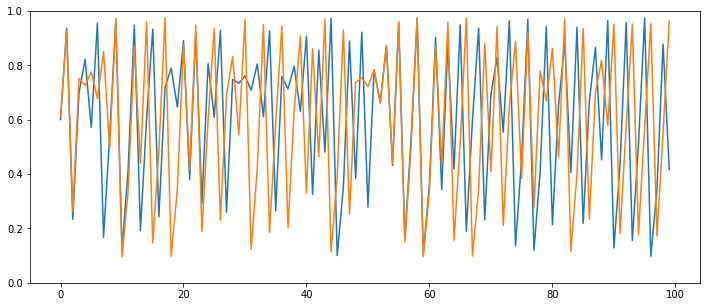

In [6]:
nsteps = 100  #Number of steps in our lil simulation 
x = np.zeros(nsteps)  #Number of bacteria at every step 
x[0] = 0.6              #The Original population size  
steps = [0.6,0.61]
r = 3.9            #Rate of population change (babies - death) 
fig1 = plt.figure(figsize = (12,5));


for x[0] in steps:
   
    
    for i in range (1,nsteps):
        x[i] = r*x[i-1] *(1-x[i-1])


    plt.plot(x);
    
plt.ylim(0,1); #Force y-axis to be between 0 and 1



## Exercise 2: Prediction Horizon

Role-Playing. Let's say we actual use this data to predict something. 

Queston: How far in the future can we reasonably predict?

How to answer this question:

* If the question is about time, the answer will probably include a plot that has "Time" as its horizontal axis. 
* If we have a plot with time as axis, and the question is about prediction quality, then probably the vertcal axis should be some kind of prediction quality 
* how to measure prediction quality: 
    * Option one, use pairs of trajectories and caluculate mean (Absolute) difference for each point in time
    * Option two, use a family of trajectories, nosify(Wiggle, shake) the starting point, check how much variance it creates at each of consecutive points 

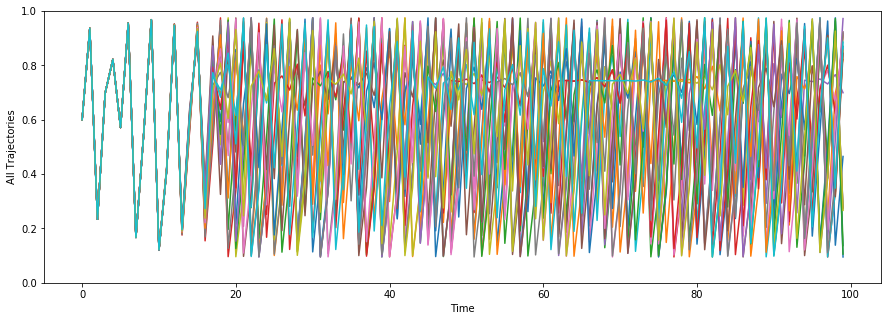

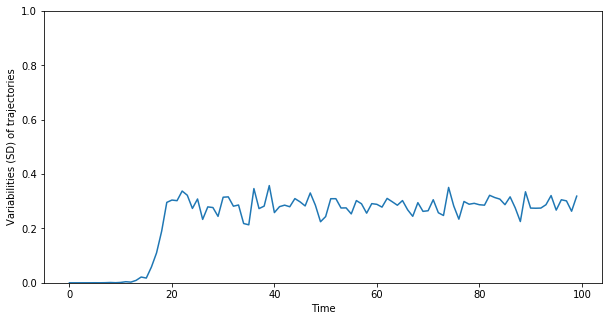

In [11]:
nsteps = 100  #Number of steps in our lil simulation 
ntraces = 20 
x[0] = 0.6              #The Original population size  
r = 3.9            #Rate of population change (babies - death) 
x = np.zeros(shape= (nsteps,ntraces))
wiggle = 0.00001               #The standard deviation of the original noise in x0

fig = plt.figure(figsize = (15,5))


for itrace in range(ntraces):
    x[0,itrace] = 0.6 + np.random.randn(1)*wiggle
   
    for istep in range (1,nsteps):
        x[istep,itrace] = r*x[istep-1,itrace] *(1-x[istep-1,itrace])

plt.plot(x)  
plt.ylim(0,1); #Force y-axis to be between 0 and 1
plt.xlabel("Time");
plt.ylabel("All Trajectories");


fig = plt.figure(figsize = (10,5))
plt.plot(np.std(x, axis = 1))   
plt.ylim(0,1); #Force y-axis to be between 0 and 1
plt.xlabel("Time");
plt.ylabel("Variabilities (SD) of trajectories");






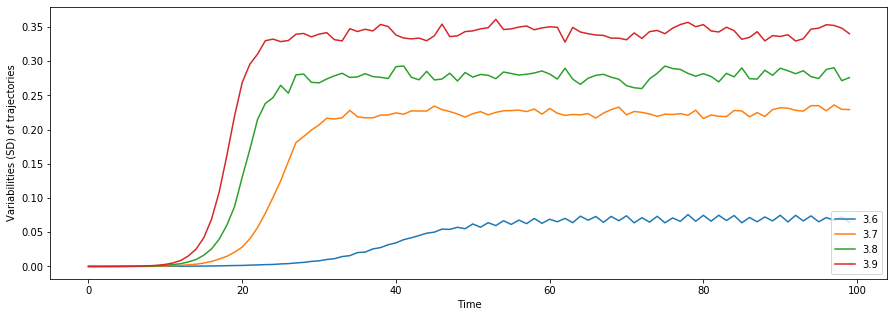

In [44]:
nsteps = 100  #Number of steps in our lil simulation 
ntrials = 1000 

steps = [.6, .60001]

x = np.zeros(shape= (nsteps,2))
diff  = np.zeros(shape= (nsteps,ntrials)) 

wiggle = 0.00001               #The standard deviation of the original noise in x0

fig = plt.figure(figsize = (15,5))



for r in np.arange(start= 3.6, stop = 4, step = 0.1):
    for itrials in range(ntrials):
        startp = np.random.uniform(low = 0, high = 1 - wiggle) + np.array([0,wiggle])
        for ipair in range(2):
            x[0,ipair] = startp[ipair]

            for istep in range (1,nsteps):
                x[istep,ipair] = r*x[istep-1,ipair] *(1-x[istep-1,ipair])

            diff[:,itrials] = np.abs(x[:,1] - x[:,0])

    plt.plot(np.mean(diff, axis = 1), label = np.around(r, decimals = 2))
    plt.legend(loc = 'lower right')


plt.xlabel("Time");
plt.ylabel("Variabilities (SD) of trajectories");



